In [1]:
import matplotlib.pyplot as plt
import numpy as np

class ActivateFunc():
    def __init__(self, x, b=None, lamb=None, alpha=None, a=None):
        super(ActivateFunc, self).__init__()
        self.x = x
        self.b = b
        self.lamb = lamb
        self.alpha = alpha
        self.a = a

    def Sigmoid(self):
        y = np.exp(self.x) / (np.exp(self.x) + 1)
        y_grad = y*(1-y)
        return [y, y_grad]

    def Tanh(self):
        y = np.tanh(self.x)
        y_grad = 1 - y * y
        return [y, y_grad]

    def Swish(self): #b是一个常数，指定b
        y = self.x * (np.exp(self.b*self.x) / (np.exp(self.b*self.x) + 1))
        y_grad = np.exp(self.b*self.x)/(1+np.exp(self.b*self.x)) + self.x * (self.b*np.exp(self.b*self.x) / ((1+np.exp(self.b*self.x))*(1+np.exp(self.b*self.x))))
        return [y, y_grad]

    def ELU(self): # alpha是个常数，指定alpha
        y = np.where(self.x > 0, self.x, self.alpha * (np.exp(self.x) - 1))
        y_grad = np.where(self.x > 0, 1, self.alpha * np.exp(self.x))
        return [y, y_grad]

    def SELU(self):  # lamb大于1，指定lamb和alpha
        y = np.where(self.x > 0, self.lamb * self.x, self.lamb * self.alpha * (np.exp(self.x) - 1))
        y_grad = np.where(self.x > 0, self.lamb*1, self.lamb * self.alpha * np.exp(self.x))
        return [y, y_grad]

    def ReLU(self):
        y = np.where(self.x < 0, 0, self.x)
        y_grad = np.where(self.x < 0, 0, 1)
        return [y, y_grad]

    def PReLU(self):    # a大于1，指定a
        y = np.where(self.x < 0, self.x / self.a, self.x)
        y_grad = np.where(self.x < 0, 1 / self.a, 1)
        return [y, y_grad]

    def LeakyReLU(self):   # a大于1，指定a
        y = np.where(self.x < 0, self.x / self.a, self.x)
        y_grad = np.where(self.x < 0, 1 / self.a, 1)
        return [y, y_grad]

    def Mish(self):
        f = 1 + np.exp(x)
        y = self.x * ((f*f-1) / (f*f+1))
        y_grad = (f*f-1) / (f*f+1) + self.x*(4*f*(f-1)) / ((f*f+1)*(f*f+1))
        return [y, y_grad]

    def ReLU6(self):
        y = np.where(np.where(self.x < 0, 0, self.x) > 6, 6, np.where(self.x < 0, 0, self.x))
        y_grad = np.where(self.x > 6, 0, np.where(self.x < 0, 0, 1))
        return [y, y_grad]

    def Hard_Swish(self):
        f = self.x + 3
        relu6 = np.where(np.where(f < 0, 0, f) > 6, 6, np.where(f < 0, 0, f))
        relu6_grad = np.where(f > 6, 0, np.where(f < 0, 0, 1))
        y = self.x * relu6 / 6
        y_grad = relu6 / 6 + self.x * relu6_grad / 6
        return [y, y_grad]

    def Hard_Sigmoid(self):
        f = (2 * self.x + 5) / 10
        y = np.where(np.where(f > 1, 1, f) < 0, 0, np.where(f > 1, 1, f))
        y_grad = np.where(f > 0, np.where(f >= 1, 0, 1 / 5), 0)
        return [y, y_grad]


def PlotActiFunc(x, y, title):
    plt.grid(which='minor', alpha=0.2)
    plt.grid(which='major', alpha=0.5)
    plt.plot(x, y)
    plt.title(title)
    plt.show()

def PlotMultiFunc(x, y):
    plt.grid(which='minor', alpha=0.2)
    plt.grid(which='major', alpha=0.5)
    plt.plot(x, y)

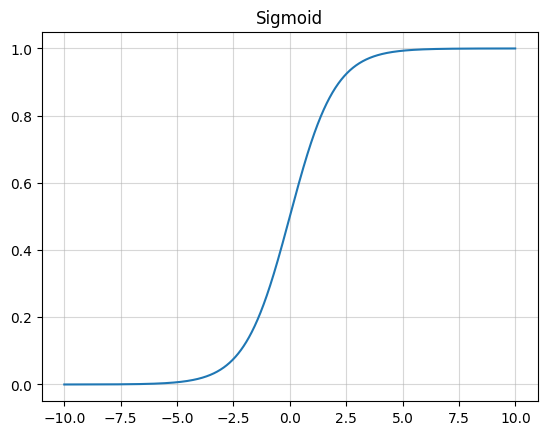

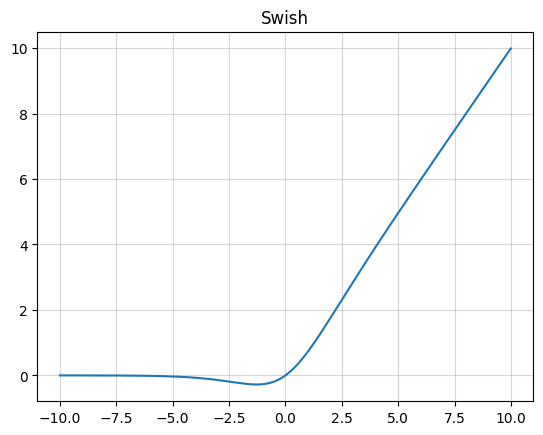

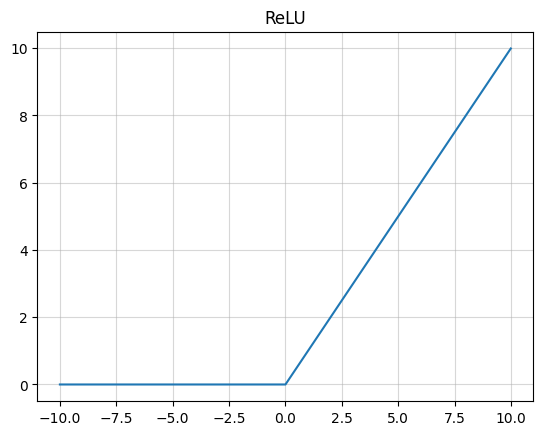

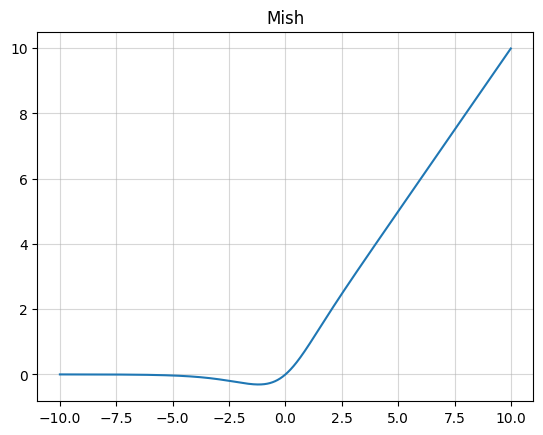

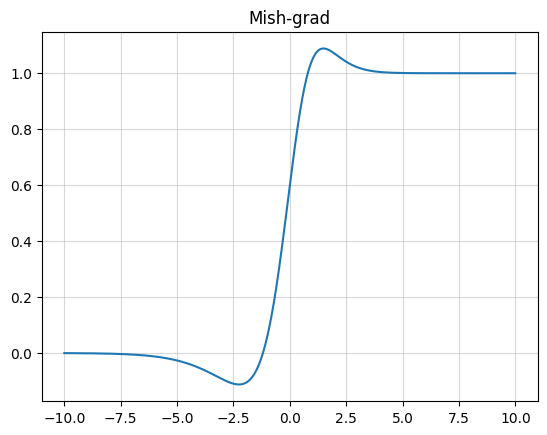

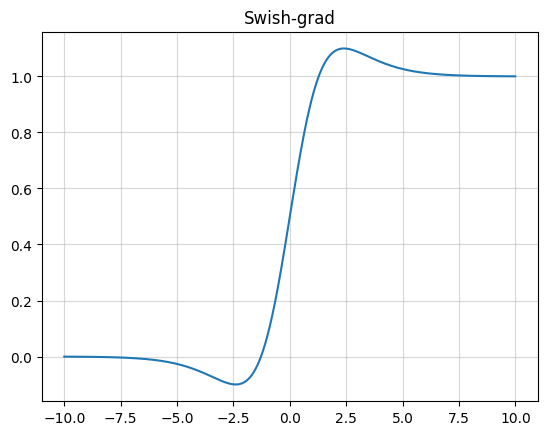

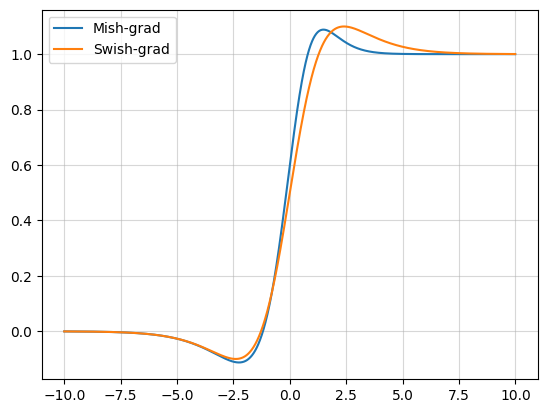

<Figure size 640x480 with 0 Axes>

In [7]:
x = np.arange(-10, 10, 0.01)
activateFunc = ActivateFunc(x)
activateFunc.b = 1
PlotActiFunc(x, activateFunc.Sigmoid()[0], title='Sigmoid')
PlotActiFunc(x, activateFunc.Swish()[0], title='Swish')
PlotActiFunc(x, activateFunc.ReLU()[0], title='ReLU')
PlotActiFunc(x, activateFunc.Mish()[0], title='Mish')
PlotActiFunc(x, activateFunc.Mish()[1], title='Mish-grad')
PlotActiFunc(x, activateFunc.Swish()[1], title='Swish-grad')

plt.figure(1)
PlotMultiFunc(x, activateFunc.Mish()[1])
PlotMultiFunc(x, activateFunc.Swish()[1])
plt.legend(['Mish-grad', 'Swish-grad'])
plt.figure(2)

# PlotMultiFunc(x, activateFunc.Swish()[0])
# PlotMultiFunc(x, activateFunc.Mish()[0])
# plt.legend(['Swish', 'Mish'])

# plt.figure(3)
# PlotMultiFunc(x, activateFunc.Swish()[0])
# PlotMultiFunc(x, activateFunc.Hard_Swish()[0])
# plt.legend(['Swish', 'Hard-Swish'])

# plt.figure(4)
# PlotMultiFunc(x, activateFunc.Sigmoid()[0])
# PlotMultiFunc(x, activateFunc.Hard_Sigmoid()[0])
# plt.legend(['Sigmoid', 'Hard-Sigmoid'])

# plt.figure(5)
# PlotMultiFunc(x, activateFunc.ReLU()[0])
# PlotMultiFunc(x, activateFunc.ReLU6()[0])
# plt.legend(['ReLU', 'ReLU6'])

# plt.figure(6)
# PlotMultiFunc(x, activateFunc.Swish()[1])
# PlotMultiFunc(x, activateFunc.Hard_Swish()[1])
# plt.legend(['Swish-grad', 'Hard-Swish-grad'])

# plt.figure(7)
# PlotMultiFunc(x, activateFunc.Sigmoid()[1])
# PlotMultiFunc(x, activateFunc.Hard_Sigmoid()[1])
# plt.legend(['Sigmoid-grad', 'Hard-Sigmoid-grad'])

# plt.figure(8)
# PlotMultiFunc(x, activateFunc.ReLU()[1])
# PlotMultiFunc(x, activateFunc.ReLU6()[1])
# plt.legend(['ReLU-grad', 'ReLU6-grad'])

plt.show()

epoch = sizeofbatch * countofbatch(countofupdate)
